<a href="https://colab.research.google.com/github/mfajaranugrah/Tugas10_python/blob/main/Tugas11_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((320, 320))) / 255.0 #normalisasi
	data.append(image)

	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07', 'GMB_07',

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [28]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.20, shuffle=True)
print(trainX.shape)
print(testX.shape)

(479, 320, 320, 3)
(120, 320, 320, 3)


In [33]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model = Sequential()
model.add(Convolution2D(8, (3,3), activation='relu', input_shape=(320,320,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(8, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

#fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 318, 318, 8)       224       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 159, 159, 8)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 157, 157, 8)       584       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 78, 78, 8)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 76, 76, 16)        1168      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 38, 38, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 36, 36, 32)       

In [34]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
15/15 [==============================] - 23s 2s/step - loss: 1.6095 - accuracy: 0.2213 - val_loss: 1.6052 - val_accuracy: 0.1750
Epoch 2/25
15/15 [==============================] - 23s 2s/step - loss: 1.5667 - accuracy: 0.2923 - val_loss: 1.5334 - val_accuracy: 0.2583
Epoch 3/25
15/15 [==============================] - 23s 2s/step - loss: 1.4769 - accuracy: 0.3257 - val_loss: 1.4204 - val_accuracy: 0.4083
Epoch 4/25
15/15 [==============================] - 23s 2s/step - loss: 1.3738 - accuracy: 0.4489 - val_loss: 1.2714 - val_accuracy: 0.5250
Epoch 5/25
15/15 [==============================] - 23s 2s/step - loss: 1.2833 - accuracy: 0.4823 - val_loss: 1.1966 - val_accuracy: 0.5500
Epoch 6/25
15/15 [==============================] - 23s 2s/step - loss: 1.1909 - accuracy: 0.5261 - val_loss: 1.1803 - val_accuracy: 0.5167
Epoch 7/25
15/15 [==============================] - 23s 2s/step - loss: 1.0388 - accuracy: 0.6263 - val_loss: 1.0279 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


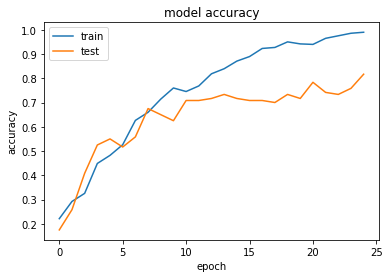

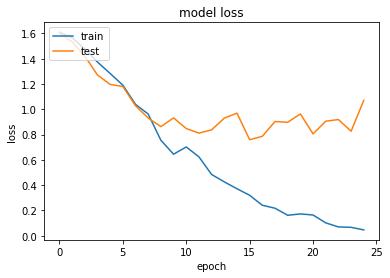

In [37]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.89      0.81      0.85        21
      GMB_03       1.00      0.80      0.89        25
      GMB_06       0.69      0.91      0.78        22
      GMB_07       0.76      0.84      0.80        31
      GMB_11       0.83      0.71      0.77        21

    accuracy                           0.82       120
   macro avg       0.84      0.81      0.82       120
weighted avg       0.83      0.82      0.82       120

